# **Zadanie 1**


Pracujesz w firmie zajmującej się e-commerce. Otrzymałeś dane o sprzedaży
dziennej (liczba sztuk) z ostatnich 30 dni.


ZADANIE:
- Wczytaj dane sprzedażowe
- Zrób wizualizację danych
- Zastosuj metodę IQR, z-score oraz opartą na percentylach (1-99%)
- Zidentyfikuj outliersów
- Wyjaśnij co mogło się stać

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sprzedaz_dzienna.csv')
display(df.head())

,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
0,0,1,65,Pn
1,1,2,71,Wt
2,2,3,69,Sr
3,3,4,73,Cz
4,4,5,74,Pt


Podgląd danych:
                               dzien  sprzedaz dzien_tygodnia
dzien                                                        
1970-01-01 00:00:00.000000000      1        65       Thursday
1970-01-01 00:00:00.000000001      2        71       Thursday
1970-01-01 00:00:00.000000002      3        69       Thursday
1970-01-01 00:00:00.000000003      4        73       Thursday
1970-01-01 00:00:00.000000004      5        74       Thursday 



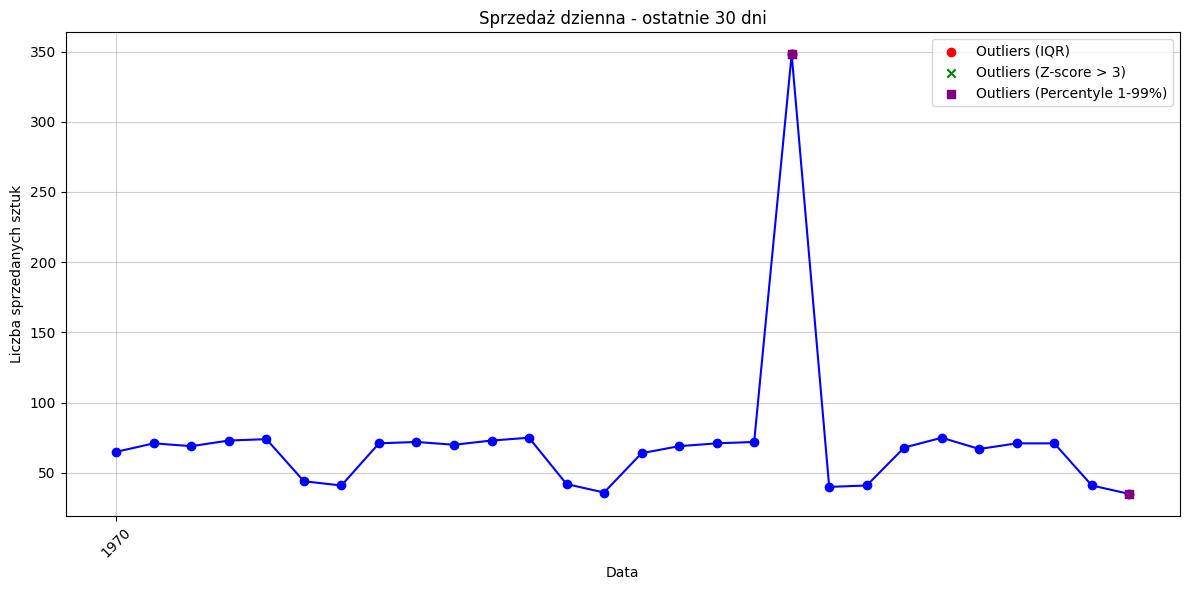


Podsumowanie znalezionych outlierów:


,Metoda,Liczba outlierów
0,IQR,1
1,Z-score (|z| > 3),1
2,Percentyle (1-99%),2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

try:
    # Assuming 'sprzedaz_dzienna.csv' has a date column that can be set as index
    # If the first column is not the date, you might need to specify it, e.g., index_col='NazwaKolumnyZDatami'
    df = pd.read_csv("/content/sprzedaz_dzienna.csv", index_col=0)
    if df.index.name is None:
        df.index.name = 'dzien'

    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    df['dzien_tygodnia'] = df.index.day_name()

    print("Podgląd danych:")
    print(df.head(), "\n")

except FileNotFoundError:
    print("Błąd: Plik sprzedaz_dzienna.csv nie został znaleziony. Upewnij się, że znajduje się w katalogu /content/.")
except Exception as e:
    print(f"Wystąpił błąd podczas wczytywania danych: {e}")

plt.figure(figsize=(12, 6))

# Main sales plot
plt.plot(df.index, df['sprzedaz'], marker='o', linestyle='-', color='blue')
plt.title("Sprzedaż dzienna - ostatnie 30 dni")
plt.ylabel("Liczba sprzedanych sztuk")
plt.grid(True, alpha=0.6)

# Outlier detection - IQR
Q1 = df['sprzedaz'].quantile(0.25)
Q3 = df['sprzedaz'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = df[(df['sprzedaz'] < lower_bound_iqr) | (df['sprzedaz'] > upper_bound_iqr)]

# Outlier detection - Z-score
z_scores = np.abs(stats.zscore(df['sprzedaz']))
threshold_z = 3
outliers_z = df[z_scores > threshold_z]

# Outlier detection - Percentile
lower_bound_p = np.percentile(df['sprzedaz'], 1)
upper_bound_p = np.percentile(df['sprzedaz'], 99)
outliers_p = df[(df['sprzedaz'] < lower_bound_p) | (df['sprzedaz'] > upper_bound_p)]

# Plotting outliers
plt.scatter(outliers_iqr.index, outliers_iqr['sprzedaz'], color='red', label='Outliers (IQR)', zorder=5)
plt.scatter(outliers_z.index, outliers_z['sprzedaz'], color='green', label=f'Outliers (Z-score > {threshold_z})', zorder=5, marker='x')
plt.scatter(outliers_p.index, outliers_p['sprzedaz'], color='purple', label='Outliers (Percentyle 1-99%)', zorder=5, marker='s')

plt.legend()
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary of outliers
summary = pd.DataFrame({
    'Metoda': ['IQR', f'Z-score (|z| > {threshold_z})', 'Percentyle (1-99%)'],
    'Liczba outlierów': [len(outliers_iqr), len(outliers_z), len(outliers_p)]
})
print("\nPodsumowanie znalezionych outlierów:")
display(summary)


/tmp/ipython-input-3060811713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dzien_tygodnia', y='srednia_sprzedaz', data=srednia_sprzedaz_dzien_tygodnia, palette='viridis')


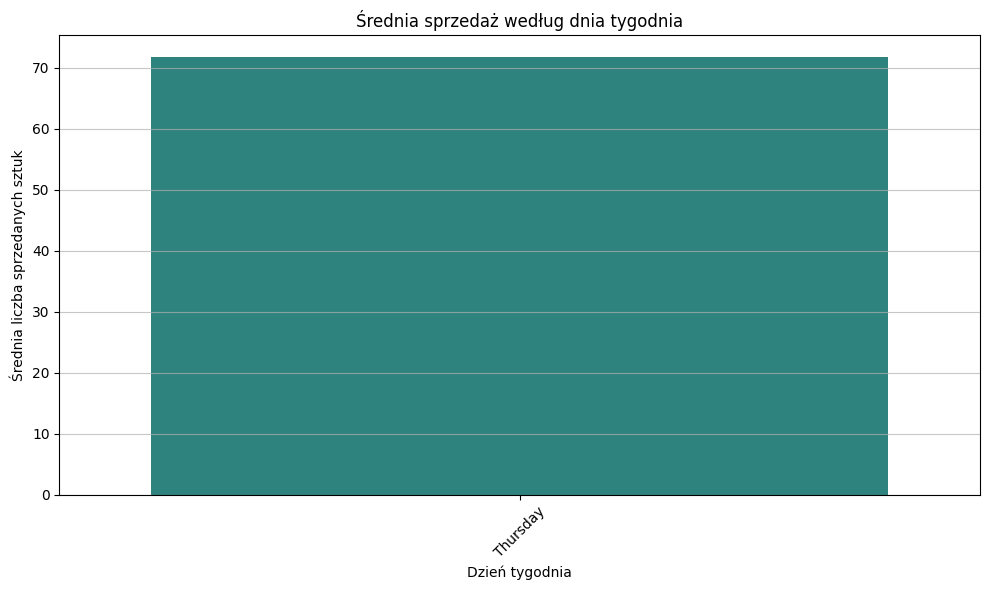

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='dzien_tygodnia', y='srednia_sprzedaz', data=srednia_sprzedaz_dzien_tygodnia, palette='viridis')
plt.title('Średnia sprzedaż według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Średnia liczba sprzedanych sztuk')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

METODA IQR

In [ ]:
# Obliczenie Q1, Q3 i IQR
Q1 = df['sprzedaz'].quantile(0.25)
Q3 = df['sprzedaz'].quantile(0.75)
IQR = Q3 - Q1

# Określenie granic dla wartości odstających
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Zidentyfikowanie wartości odstających
outliers_iqr = df[(df['sprzedaz'] < lower_bound) | (df['sprzedaz'] > upper_bound)]

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Dolna granica: {lower_bound}')
print(f'Górna granica: {upper_bound}')

print("\nWartości odstające zidentyfikowane metodą IQR:")
display(outliers_iqr)

Q1: 43.5
Q3: 72.0
IQR: 28.5
Dolna granica: 0.75
Górna granica: 114.75

Wartości odstające zidentyfikowane metodą IQR:


,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
18,18,19,348,Pt


METODA z-score


In [ ]:
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("METODA 2: Z-SCORE")
print("="*60)

srednia = np.mean(df['sprzedaz'])
std_dev = np.std(df['sprzedaz'], ddof=1)  # ddof=1 dla próby
z_scores = np.abs(stats.zscore(df['sprzedaz']))

print(f"\nŚrednia (μ) = {srednia:.2f}")
print(f"Odchylenie standardowe (σ) = {std_dev:.2f}")
print(f"\nFormuła: z = (x - μ) / σ")
print(f"\nZ-score dla każdej wartości:")

for i, (wartosc, z) in enumerate(zip(df['sprzedaz'], z_scores)):
    status = "⚠️ OUTLIER" if z > 3 else ""
    print(f"  {wartosc:5.1f} → z = {z:6.2f} {status}")

outliers_zscore = df[z_scores > 3]
print(f"\n✓ OUTLIERSY WYKRYTE (z > 3):")
display(outliers_zscore)


METODA 2: Z-SCORE

Średnia (μ) = 71.75
Odchylenie standardowe (σ) = 55.99

Formuła: z = (x - μ) / σ

Z-score dla każdej wartości:
   65.0 → z =   0.12 
   71.0 → z =   0.01 
   69.0 → z =   0.05 
   73.0 → z =   0.02 
   74.0 → z =   0.04 
   44.0 → z =   0.50 
   41.0 → z =   0.56 
   71.0 → z =   0.01 
   72.0 → z =   0.00 
   70.0 → z =   0.03 
   73.0 → z =   0.02 
   75.0 → z =   0.06 
   42.0 → z =   0.54 
   36.0 → z =   0.65 
   64.0 → z =   0.14 
   69.0 → z =   0.05 
   71.0 → z =   0.01 
   72.0 → z =   0.00 
  348.0 → z =   5.02 ⚠️ OUTLIER
   40.0 → z =   0.58 
   41.0 → z =   0.56 
   68.0 → z =   0.07 
   75.0 → z =   0.06 
   67.0 → z =   0.09 
   71.0 → z =   0.01 
   71.0 → z =   0.01 
   41.0 → z =   0.56 
   35.0 → z =   0.67 

✓ OUTLIERSY WYKRYTE (z > 3):


,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
18,18,19,348,Pt


METODA Percentyl


In [ ]:
print("\n" + "="*60)
print("METODA 3: PERCENTYL")
print("="*60)

p1 = np.percentile(df['sprzedaz'], 1)
p99 = np.percentile(df['sprzedaz'], 99)
p5 = np.percentile(df['sprzedaz'], 5)
p95 = np.percentile(df['sprzedaz'], 95)

print(f"\n1. percentyl = {p1:.2f}")
print(f"5. percentyl = {p5:.2f}")
print(f"95. percentyl = {p95:.2f}")
print(f"99. percentyl = {p99:.2f}")

outliers_percentile = df[(df['sprzedaz'] < p1) | (df['sprzedaz'] > p99)]

print(f"\nOutliersy poniżej 1. percentyla lub powyżej 99. percentyla:")
display(outliers_percentile)


METODA 3: PERCENTYL

1. percentyl = 35.27
5. percentyl = 37.40
95. percentyl = 75.00
99. percentyl = 274.29

Outliersy poniżej 1. percentyla lub powyżej 99. percentyla:


,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
18,18,19,348,Pt
27,27,28,35,Nd


# **Identyfikacja outliersów**

In [ ]:
display(outliers_iqr)

,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
18,18,19,348,Pt


In [ ]:
display(outliers_zscore)

,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
18,18,19,348,Pt


In [ ]:
display(outliers_percentile)

,Unnamed: 0,dzien,sprzedaz,dzien_tygodnia
18,18,19,348,Pt
27,27,28,35,Nd


# **Wyjaśnienie**
Wysoka sprzedaż w dniu 19. mogła być wynikiem promocji lub wprowadzenia nowego produktu, podczas gdy niska sprzedaż w dniu 28. (niedziela) mogła wynikać z naturalnego spadku aktywności lub problemów technicznych.

## **Zadanie 2**

Jesteś analitykiem w banku. Otrzymałeś dane o klientach zaciągających kredyty.
Każdy klient ma 4 cechy:
  1. Wiek (lata)
  2. Dochód roczny (tys. PLN)
  3. Suma kredytów (tys. PLN)
  4. Liczba lat jako klient

Do zrobienia:
- Zidentyfikować klientów wielowymiarowych outliersów
- Użyj metody z-score dla każdego wymiaru osobno

In [ ]:
import pandas as pd
df = pd.read_csv('/content/klienci_banku.csv')
display(df.head())

,Unnamed: 0,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient
0,0,53.18,80.63,65.34,12.99
1,1,41.28,75.23,218.69,3.96
2,2,48.89,87.45,145.27,2.99
3,3,43.44,64.46,212.89,7.93
4,4,46.16,91.39,71.28,9.25


In [ ]:
import numpy as np
from scipy import stats

# Kolumny do analizy (cechy klienta)
features = ['wiek_lat', 'dochod_roczny_tys', 'suma_kredytow_tys', 'lata_jako_klient']

# Obliczenie Z-score dla każdej cechy
z_scores_multi = df[features].apply(lambda x: np.abs(stats.zscore(x)))

print("Bezwzględne wartości Z-score dla każdej cechy:")
display(z_scores_multi.head())

# Zidentyfikowanie potencjalnych wartości odstających
# Użyjemy progu z-score = 3 dla każdego wymiaru
outlier_threshold = 3
potential_outliers_multi = df[(z_scores_multi > outlier_threshold).any(axis=1)]

print(f"\nPotencjalne wielowymiarowe wartości odstające (Z-score > {outlier_threshold} w co najmniej jednym wymiarze):")
display(potential_outliers_multi)

Bezwzględne wartości Z-score dla każdej cechy:


,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient
0,0.066194,0.158499,0.229029,0.229273
1,0.154794,0.166336,0.117703,0.425109
2,0.098135,0.148601,0.171003,0.495403
3,0.138712,0.181967,0.121913,0.137413
4,0.118461,0.142883,0.224717,0.041756



Potencjalne wielowymiarowe wartości odstające (Z-score > 3 w co najmniej jednym wymiarze):


,Unnamed: 0,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient
48,48,999.0,5001.0,10001.0,100.1
